In [2]:
import tensorflow as tf
import os

In [3]:
input_img_size =(128,128)
input_shape = (128,128,3)

In [4]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [5]:
train_gen = tf_generator.flow_from_directory(
    os.getcwd()+r"\cats_and_dogs_filtered\train",
    target_size=input_img_size,
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32, #read32img per
    shuffle=True,
)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+r"\cats_and_dogs_filtered\validation",
    target_size=input_img_size,
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32, #read32img per
    shuffle=True,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


0.0


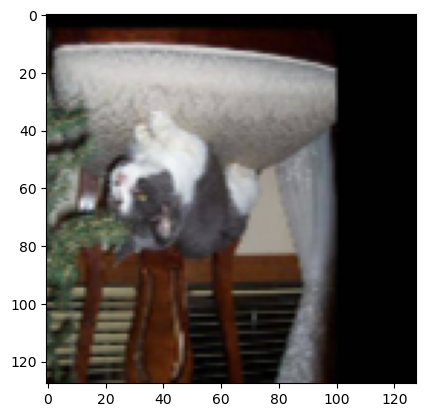

In [6]:
import matplotlib.pyplot as plt

test_label = None
test_img =None
for img,label in train_gen:
    test_label= label
    test_img = img
    
    break

print(test_label[0])
plt.imshow(test_img[0])

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Conv Layer 1
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 1
    Conv2D(64, (3, 3), activation='relu'),                          # Conv Layer 2
    MaxPooling2D((2, 2)),                                           # Max Pooling Layer 2
    Flatten(),                                                      # Flatten Layer
    Dense(128, activation='relu'),                                  # Fully Connected Layer
    Dense(1, activation='softmax')      
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer =Adam(),
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_gen,epochs=10,validation_data=test_gen,verbose=1)

Epoch 1/10
63/63 [==============================] - 21s 274ms/step - loss: 0.7484 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 42s 662ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 15s 231ms/step - loss: 0.6864 - accuracy: 0.5000 - val_loss: 0.6680 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 15s 237ms/step - loss: 0.6793 - accuracy: 0.5000 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 14s 224ms/step - loss: 0.6653 - accuracy: 0.5000 - val_loss: 0.6620 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 14s 225ms/step - loss: 0.6747 - accuracy: 0.5000 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 13s 207ms/step - loss: 0.6630 - accuracy: 0.5000 - val_loss: 0.6632 - val_accuracy: 0.5000

1/1 [==============================] - 0s 293ms/step
0.0


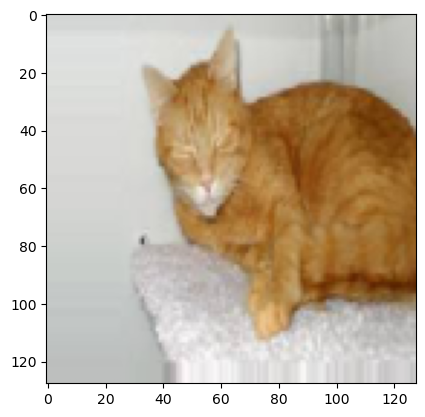

In [10]:
import numpy as np
index =1
sample_label = test_label[index]
sample_img = test_img[index]

_pred = model.predict(np.array([sample_img]))

print(sample_label)
plt.imshow(sample_img)